## Creating a multi layer graph from text data with the time activity

### Loading the text data

In [1]:
import pandas as pd

In [2]:
import configparser
config = configparser.ConfigParser()
config.read('memeconfig.ini')
data_path = config['DEFAULT']['data_path']
pickle_data_path = config['DEFAULT']['pickle_data_path']
viz_path = config['DEFAULT']['viz_data_path']
series_name = 'LBDL'

In [3]:
series_name = 'LBDL'
#series_name = 'marseille'
pickle_file = pickle_data_path+series_name+'_texts'+'.pkl'
vocab_file = pickle_data_path+series_name+'_vocab_bow'+'.pkl'
tfidf_file = pickle_data_path+series_name+'_vocab_tfidf'+'.pkl'
text_data = pd.read_pickle(pickle_file)
vocab_data = pd.read_pickle(vocab_file)
tfidf_data = pd.read_pickle(tfidf_file)

In [4]:
import memebox.multilayergraph as mlg

In [5]:
day_list = mlg.days_of_month(2015,2)

Dates are from 01-02-2015 to 28-02-2015.


### Creating the graph

In [6]:
%time H = mlg.multilayergraph(text_data,day_list,threshold=30)

Nb of edges: 48, nb of nodes: 79.
CPU times: user 452 ms, sys: 0 ns, total: 452 ms
Wall time: 451 ms


In [89]:
%time H = mlg.multilayergraph(text_data,day_list,threshold=10)

Nb of edges: 7297, nb of nodes: 7866.
CPU times: user 8.32 s, sys: 0 ns, total: 8.32 s
Wall time: 8.32 s


In [7]:
import networkx as nx
G_all = nx.DiGraph()
cc = nx.weakly_connected_component_subgraphs(H)
#for c in nx.weakly_connected_component_subgraphs(graph):


In [8]:
Gmax = max(nx.weakly_connected_component_subgraphs(H), key=len)

In [9]:
gmnodes = Gmax.nodes()
gmnodes

['Gear_2015-02-06',
 'Samsung_2015-02-06',
 'Galaxy_2015-02-06',
 'Tab_2015-02-06',
 'Note_2015-02-06']

In [10]:
Gmax.edges(data=True)

[('Galaxy_2015-02-06',
  'Tab_2015-02-06',
  {'label': 'intralayer',
   'media_list': ['Website',
    'Website',
    'Website',
    'Website',
    'Website',
    'Website',
    'Website',
    'Website',
    'Website',
    'Website',
    'Website',
    'Website',
    'Website',
    'Website',
    'Website',
    'Website',
    'Website',
    'Website',
    'Website',
    'Website',
    'Website',
    'Website',
    'Website',
    'Website',
    'Website',
    'Website',
    'Website',
    'Website',
    'Website',
    'Website',
    'Website',
    'Website',
    'Website',
    'Website',
    'Website',
    'Website',
    'Website',
    'Website',
    'Website',
    'Website',
    'Website',
    'Website',
    'Website',
    'Website',
    'Website',
    'Website',
    'Website',
    'Website',
    'Website',
    'Website',
    'Website',
    'Website',
    'Website',
    'Website',
    'Website',
    'Website',
    'Website',
    'Website',
    'Website',
    'Website',
    'Website',
  

### Coded as a matrix

In [80]:
df_nodes = pd.DataFrame()
for node,data in Gmax.nodes(data=True):
    df_nodes.loc[data['name'],data['timestamp']]=data['degree']
df_nodes.fillna(0,inplace=True)
df_nodes.sort_index(axis=1,inplace=True)

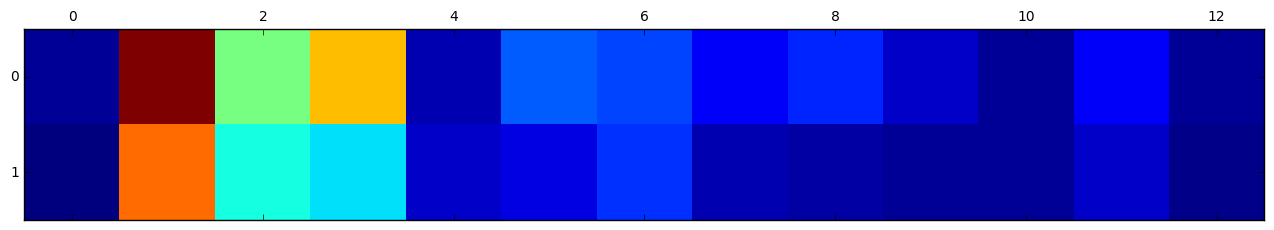

In [81]:
import matplotlib.pyplot as plt
plt.matshow(df_nodes.as_matrix())
plt.show()

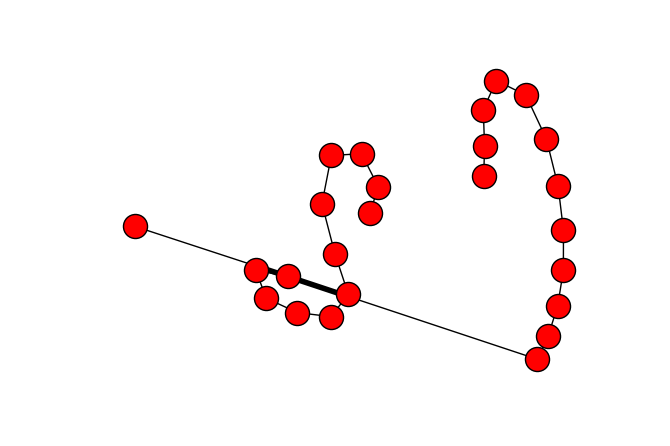

In [82]:
import matplotlib.pyplot as plt
nx.draw_spring(Gmax)
plt.show()

In [11]:
def days_of_month(year,month):
    """ return a list of the days of the chosen month
        elements are in the datetime format
    """
    import datetime
    from dateutil.relativedelta import relativedelta
    # Choose the year
    base = datetime.datetime(year,1,1)
    #three_mon_rel = relativedelta(months=3)
    month_list = [base + relativedelta(month=x) for x in range(1, 13)]
    month_list = month_list+[datetime.datetime(year+1,1,1)]
    # day list
    day_list = [month_list[month-1]+datetime.timedelta(days=n) for n in range(31) 
            if month_list[month-1]+datetime.timedelta(days=n)<month_list[month]]
    start_date=day_list[0].strftime("%d-%m-%Y")
    end_date=day_list[-1].strftime("%d-%m-%Y")
    print('Dates are from {} to {}.'.format(start_date,end_date))
    return day_list

In [12]:
days_of_month(2015,1)

Dates are from 01-01-2015 to 31-01-2015.


[datetime.datetime(2015, 1, 1, 0, 0),
 datetime.datetime(2015, 1, 2, 0, 0),
 datetime.datetime(2015, 1, 3, 0, 0),
 datetime.datetime(2015, 1, 4, 0, 0),
 datetime.datetime(2015, 1, 5, 0, 0),
 datetime.datetime(2015, 1, 6, 0, 0),
 datetime.datetime(2015, 1, 7, 0, 0),
 datetime.datetime(2015, 1, 8, 0, 0),
 datetime.datetime(2015, 1, 9, 0, 0),
 datetime.datetime(2015, 1, 10, 0, 0),
 datetime.datetime(2015, 1, 11, 0, 0),
 datetime.datetime(2015, 1, 12, 0, 0),
 datetime.datetime(2015, 1, 13, 0, 0),
 datetime.datetime(2015, 1, 14, 0, 0),
 datetime.datetime(2015, 1, 15, 0, 0),
 datetime.datetime(2015, 1, 16, 0, 0),
 datetime.datetime(2015, 1, 17, 0, 0),
 datetime.datetime(2015, 1, 18, 0, 0),
 datetime.datetime(2015, 1, 19, 0, 0),
 datetime.datetime(2015, 1, 20, 0, 0),
 datetime.datetime(2015, 1, 21, 0, 0),
 datetime.datetime(2015, 1, 22, 0, 0),
 datetime.datetime(2015, 1, 23, 0, 0),
 datetime.datetime(2015, 1, 24, 0, 0),
 datetime.datetime(2015, 1, 25, 0, 0),
 datetime.datetime(2015, 1, 26, 0,

### Coded as a json

In [21]:
def CC_to_df(ccomponent):
    import base64
    df_nodes = pd.DataFrame()
    node_list = ccomponent.nodes()
    print(node_list)
    sorted_node_list = sorted(node_list)
    print(sorted_node_list)
    ccomponent_id = sorted_node_list[0] #unique id for the component (can be any node of the component)
    ccomponent_id = base64.urlsafe_b64encode(ccomponent_id.encode('UTF-8')).decode('UTF-8')
    for node,data in ccomponent.nodes(data=True):
        df_nodes.loc[node,'id']=node
        df_nodes.loc[node,'name']=data['name']
        df_nodes.loc[node,'day']=data['timestamp'].day
        df_nodes.loc[node,'month']=data['timestamp'].month
        df_nodes.loc[node,'year']=data['timestamp'].year
        df_nodes.loc[node,'degree']=data['degree']
        df_nodes.loc[node,'cc_id']=ccomponent_id
    df_nodes.day = df_nodes.day.astype(int)
    df_nodes.month = df_nodes.month.astype(int)
    df_nodes.year = df_nodes.year.astype(int)
    df_nodes.degree = df_nodes.degree.astype(int)
    df_nodes = df_nodes.sort_values('degree',ascending=False)
    ids,indices = df_nodes.name.factorize() # associate a number to each unique name
    df_nodes['word_id_nb']=ids
    return df_nodes,ccomponent_id

In [22]:
df_nodes = CC_to_df(Gmax)

['Galaxy_2015-02-06', 'Gear_2015-02-06', 'Note_2015-02-06', 'Tab_2015-02-06', 'Samsung_2015-02-06']
['Galaxy_2015-02-06', 'Gear_2015-02-06', 'Note_2015-02-06', 'Samsung_2015-02-06', 'Tab_2015-02-06']


In [23]:
df_nodes

(                                    id     name  day  month  year  degree  \
 Galaxy_2015-02-06    Galaxy_2015-02-06   Galaxy    6      2  2015     522   
 Samsung_2015-02-06  Samsung_2015-02-06  Samsung    6      2  2015     480   
 Note_2015-02-06        Note_2015-02-06     Note    6      2  2015     200   
 Tab_2015-02-06          Tab_2015-02-06      Tab    6      2  2015     178   
 Gear_2015-02-06        Gear_2015-02-06     Gear    6      2  2015     132   
 
                                        cc_id  word_id_nb  
 Galaxy_2015-02-06   R2FsYXh5XzIwMTUtMDItMDY=           0  
 Samsung_2015-02-06  R2FsYXh5XzIwMTUtMDItMDY=           1  
 Note_2015-02-06     R2FsYXh5XzIwMTUtMDItMDY=           2  
 Tab_2015-02-06      R2FsYXh5XzIwMTUtMDItMDY=           3  
 Gear_2015-02-06     R2FsYXh5XzIwMTUtMDItMDY=           4  ,
 'R2FsYXh5XzIwMTUtMDItMDY=')

In [87]:
len([ccomponent.size() for ccomponent in nx.weakly_connected_component_subgraphs(H) if ccomponent.size()>0])

2893

In [97]:
nlist = [data['name'] for node,data in Gmax.nodes(data=True)]

In [103]:
len(set(nlist))>0

True

In [105]:
df_nodes.to_json('viz/timecomponent1.json',orient='records')#orient='index')

AttributeError: 'tuple' object has no attribute 'to_json'

In [109]:
for ccomponent in nx.weakly_connected_component_subgraphs(H):
    name_list = [data['name'] for node,data in ccomponent.nodes(data=True)]
    if len(set(name_list))>1:
        df,cc_id = CC_to_df(ccomponent)
        print(cc_id)
        df.to_json('viz/ccomponents/timecomponent_'+cc_id+'.json',orient='records')

w6l0dWRlXzIwMTUtMDItMDY=
RXRhc3NlXzIwMTUtMDItMDc=
RW1qaV8yMDE1LTAyLTI2
RWxlYV8yMDE1LTAyLTI2
c8Opcmllc18yMDE1LTAyLTI2
cmVnYXJkXzIwMTUtMDItMDc=
Y29udGludV8yMDE1LTAyLTI2
Y291cGxlc18yMDE1LTAyLTA3
YXByw6hzXzIwMTUtMDItMDU=
eW9nYV8yMDE1LTAyLTA3
cmllbl8yMDE1LTAyLTA3
cXVlc3Rpb25fMjAxNS0wMi0wNQ==
UmF5bW9uZF8yMDE1LTAyLTA3
aHVtb3VyXzIwMTUtMDItMDc=
RmFiaWVuXzIwMTUtMDItMDc=
Q2hsb8OpXzIwMTUtMDItMDc=
UHVtcF8yMDE1LTAyLTA2
Um9jaGFudF8yMDE1LTAyLTI0
U2FtdWVsXzIwMTUtMDItMDc=
b3JpZ2luYWxlXzIwMTUtMDItMjY=
YWdvXzIwMTUtMDItMDU=
Q2FtaWxsZV8yMDE1LTAyLTA3
TcOpdGFfMjAxNS0wMi0yNg==
cXVpbnF1YV8yMDE1LTAyLTA3
c3VpdGVfMjAxNS0wMi0yNQ==
Vk9TVEZSXzIwMTUtMDItMDU=
b3JpZ2luYWxfMjAxNS0wMi0wNQ==
UGxhdGFuZV8yMDE1LTAyLTA3


### Work on the edges

In [108]:
Gmax = max(nx.weakly_connected_component_subgraphs(H), key=len)

In [33]:
pd.value_counts(Gmax.edges(data=True)[0][2]['media_list']).to_dict()

{'Website': 70}

In [110]:
Gmax.node['Légendes_2015-05-22']

{'color': 0.6774193548387096,
 'name': 'Légendes',
 'timestamp': datetime.datetime(2015, 5, 22, 0, 0)}

In [34]:
import memebox.treegraph as mtg
df_edges = pd.DataFrame()
for (node1,node2,data) in Gmax.edges(data=True):
    node1_data,node2_data = Gmax.node[node1],Gmax.node[node2]
    if (node1_data['timestamp']==node2_data['timestamp']): # if this is an intra-layer edge
        edge_id = node1+'_'+node2
        print('=='+edge_id)
        df_edges.loc[edge_id,'id']=edge_id
        df_edges.loc[edge_id,'name']=node1_data['name']+' '+node2_data['name']
        df_edges.loc[edge_id,'day']=node1_data['timestamp'].day
        df_edges.loc[edge_id,'month']=node1_data['timestamp'].month
        df_edges.loc[edge_id,'year']=node1_data['timestamp'].year
        df_edges.loc[edge_id,'occur']=data['weight']
        medias = pd.value_counts(data['media_list']).to_dict()
        main_media,media_occur = mtg.get_main_media(medias)
        df_edges.loc[edge_id,'main_media']=main_media
        df_edges.loc[edge_id,'main_media_occur']=media_occur
df_edges.day = df_edges.day.astype(int)
df_edges.month = df_edges.month.astype(int)
df_edges.year = df_edges.year.astype(int)
df_edges.occur = df_edges.occur.astype(int)
df_edges.main_media_occur = df_edges.main_media_occur.astype(int)

==Galaxy_2015-02-06_Note_2015-02-06
==Galaxy_2015-02-06_Tab_2015-02-06
==Samsung_2015-02-06_Galaxy_2015-02-06
==Samsung_2015-02-06_Gear_2015-02-06


In [35]:
# group edges with same name
ids,indices = df_edges.name.factorize()
df_edges['id_nb']=ids

In [36]:
df_edges

,id,name,day,month,year,occur,main_media,main_media_occur,id_nb
Galaxy_2015-02-06_Note_2015-02-06,Galaxy_2015-02-06_Note_2015-02-06,Galaxy Note,6,2,2015,70,Website,70,0
Galaxy_2015-02-06_Tab_2015-02-06,Galaxy_2015-02-06_Tab_2015-02-06,Galaxy Tab,6,2,2015,89,Website,89,1
Samsung_2015-02-06_Galaxy_2015-02-06,Samsung_2015-02-06_Galaxy_2015-02-06,Samsung Galaxy,6,2,2015,150,Website,150,2
Samsung_2015-02-06_Gear_2015-02-06,Samsung_2015-02-06_Gear_2015-02-06,Samsung Gear,6,2,2015,50,Website,50,3


In [123]:
df_edges.to_json('viz/timecomponent1e.json',orient='records')#orient='index')

In [11]:
def CC_to_df_edges(ccomponent,date_delta):
    """ Create a dataframe of edges with their properties to analyse the time evolution of a component
        ccomponent is a graph, connected component of the multilayer graph.
        date_delta = 'day' or 'hour'
        returns: 
        - a dataframe containing edges and edges properties as columns
        - a component id that will be used to identify the component
            (this id is also attached to each node of the component)
    """
    df_edges = pd.DataFrame()    
    ccomponent_id = create_cc_id(ccomponent) #unique id for the component
    for (node1,node2,data) in ccomponent.edges(data=True):
        node1_data,node2_data = ccomponent.node[node1],ccomponent.node[node2]
        if (node1_data['timestamp']==node2_data['timestamp']): # if this is an intra-layer edge
            edge_id = node1+'_'+node2
            #print('=='+edge_id)
            df_edges.loc[edge_id,'id']=edge_id
            df_edges.loc[edge_id,'name']=node1_data['name']+' '+node2_data['name']
            if date_delta=='hour':
                df_edges.loc[edge_id,'hour']=data['timestamp'].hour
            df_edges.loc[edge_id,'day']=node1_data['timestamp'].day
            df_edges.loc[edge_id,'month']=node1_data['timestamp'].month
            df_edges.loc[edge_id,'year']=node1_data['timestamp'].year
            df_edges.loc[edge_id,'occur']=data['weight']
            medias = pd.value_counts(data['media_list']).to_dict()
            main_media,media_occur = mtg.get_main_media(medias)
            df_edges.loc[edge_id,'main_media']=main_media
            df_edges.loc[edge_id,'main_media_occur']=media_occur
            df_edges.loc[edge_id,'cc_id']=ccomponent_id
    df_edges.day = df_edges.day.astype(int)
    df_edges.month = df_edges.month.astype(int)
    df_edges.year = df_edges.year.astype(int)
    df_edges.occur = df_edges.occur.astype(int)
    if date_delta=='hour':
        df_edges.hour = df_edges.hour.astype(int)
    df_edges.main_media_occur = df_edges.main_media_occur.astype(int)
    df_edges = df_edges.sort_values('occur',ascending=False)
    ids,indices = df_edges.name.factorize() # associate a number to each unique node name in the component
    df_edges['word_id_nb']=ids # used for the visualization
    return df_edges,ccomponent_id

In [11]:
df_edges,ccomponent_id=mlg.CC_to_df_edges(Gmax,'month')

In [12]:
df_edges

,id,name,day,month,year,occur,main_media,main_media_occur,cc_id,word_id_nb
Samsung_2015-02-06_Galaxy_2015-02-06,Samsung_2015-02-06_Galaxy_2015-02-06,Samsung Galaxy,6,2,2015,150,Website,150,R2FsYXh5XzIwMTUtMDItMDY=,0
Galaxy_2015-02-06_Tab_2015-02-06,Galaxy_2015-02-06_Tab_2015-02-06,Galaxy Tab,6,2,2015,89,Website,89,R2FsYXh5XzIwMTUtMDItMDY=,1
Galaxy_2015-02-06_Note_2015-02-06,Galaxy_2015-02-06_Note_2015-02-06,Galaxy Note,6,2,2015,70,Website,70,R2FsYXh5XzIwMTUtMDItMDY=,2
Samsung_2015-02-06_Gear_2015-02-06,Samsung_2015-02-06_Gear_2015-02-06,Samsung Gear,6,2,2015,50,Website,50,R2FsYXh5XzIwMTUtMDItMDY=,3


In [13]:
ccomponent_id

'R2FsYXh5XzIwMTUtMDItMDY='

### Compress all the components

In [7]:
%time G_all2 = mlg.compress_multilayer(H)

CPU times: user 6.72 s, sys: 0 ns, total: 6.72 s
Wall time: 6.72 s


In [8]:
G_all2.graph['series_name'] = series_name

### Save the compressed components

In [9]:
json_filename = 'ccomponent.json'
filename = viz_path + json_filename
mlg.save_graph(G_all2,filename)
print('Graph written to file: {}'.format(filename))

Graph written to file: /home/benjamin/Documents/memetracker/viz/ccomponent.json


In [10]:
G_all2.graph

{'end_date': '31-05-2015',
 'name': '()',
 'series_name': 'LBDL',
 'start_date': '01-05-2015'}

In [12]:
G_all2.size()

92

### Visualize the compressed components

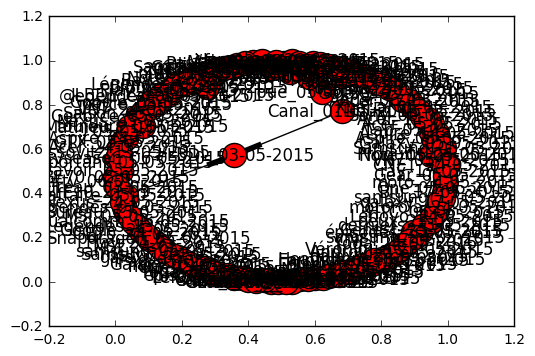

In [13]:
mlg.draw_graph(G_all2)

In [14]:
# open a web browser to show the components
url =  'http://localhost:8008/forcegraphmeme.html'+'?'+'file='+json_filename
mlg.web_viz(G_all2,url)